(670, 2) (670,)
[5.39686745 1.05100436] 1
[-9.45173042  7.02105323] 3
[-3.70050112  9.67083974] 0
[-1.69568041  7.78342181] 0
[-8.20455088  7.73732201] 3
[2.97047356 2.51652988] 1
[-2.41743685  7.02671721] 0
[-9.82691886  6.2199336 ] 3
[-9.0973699   7.12717307] 3
[3.76426058 0.59036995] 1
Y_TRAIN
SHAPE:  (670,)
First:  1
FShpe:  ()


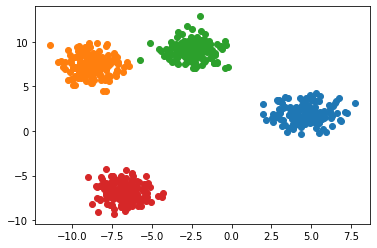

In [1]:
# https://www.knowledgehut.com/blog/data-science/types-of-classification-in-ml
from sklearn.datasets import make_blobs 
from collections import Counter 
from numpy import where 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=670, centers=4, random_state=42) 
my_counter = Counter(y) 
for my_label, _ in my_counter.items(): 
	row_ix = where(y == my_label)[0] 
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(my_label))
print(X.shape, y.shape)
for i in range(10):
	print(X[i], y[i])

# le = OneHotEncoder()
# yy = y.reshape(-1, 1)
# y = le.fit_transform(yy).toarray()

print("Y_TRAIN")
print("SHAPE: ",y.shape)
print("First: ",y[0])
print("FShpe: ",y[0].shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Example data: 


C:\Users\johan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


Y_TRAIN
SHAPE:  (10000,)
First:  7
FShpe:  ()


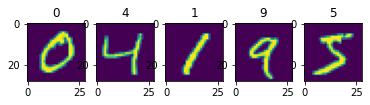

In [2]:
# Loading MNIST Datasets
# Additional Reference for loading & preprocessing the dataset 
# https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
import tensorflow.keras.datasets.mnist as mnist_dataset
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

print('Example data: ')
for idx, x in enumerate(zip(x_train[:5], y_train[:5])):
    plt.subplot("15{}".format(idx))
    plt.title(x[1])
    plt.imshow(x[0])

# Cast as float
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# Normalize Data
x_train /= 255.0
x_test /= 255.0

# Prepare data for
# x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Flatten the input (Because we do not use CNN)
x_train = np.array([x.flatten() for x in x_train])
x_test = np.array([x.flatten() for x in x_test])

# # Transform Labels
# le = OneHotEncoder()
# yy = y_train.reshape(-1, 1)
# # y_train = le.fit_transform(yy).toarray()
# le.fit(yy)
# y_train = le.transform(yy).toarray()

# yy = y_test.reshape(-1, 1)
# # y_test = le.fit_transform(yy).toarray()
# y_test = le.transform(yy).toarray()

print("Y_TRAIN")
print("SHAPE: ",y_test.shape)
print("First: ",y_test[0])
print("FShpe: ",y_test[0].shape)

In [3]:
# PSO Implementation
 # Neural network architecture
# n_inputs = x_train[0].shape[0]
# n_hidden = 20
# n_classes = 4
n_inputs = x_train[0].shape[0]
n_hidden = 100
n_classes = 10

# Forward propagation
def forward_prop(params):
    """Forward propagation as objective function

    This computes for the forward propagation of the neural network, as
    well as the loss. It receives a set of parameters that must be 
    rolled-back into the corresponding weights and biases.

    Inputs
    ------
    params: np.ndarray
        The dimensions should include an unrolled version of the 
        weights and biases.

    Returns
    -------
    float
        The computed negative log-likelihood loss given the parameters
    """
   
    # Roll-back the weights and biases
    W1_len = n_inputs * n_hidden
    b1_len = W1_len + n_hidden
    W2_len = b1_len + (n_hidden * n_classes)


    # print(b1_len,W2_len)
    # print(params[b1_len:W2_len])
    # W1 = params[0:80].reshape((n_inputs, n_hidden)) 
    # b1 = params[80:100].reshape((n_hidden,))
    # W2 = params[100:160].reshape((n_hidden, n_classes))
    # b2 = params[160:163].reshape((n_classes,))
    W1 = params[0:W1_len].reshape((n_inputs, n_hidden)) 
    b1 = params[W1_len:b1_len].reshape((n_hidden,))
    W2 = params[b1_len:W2_len].reshape((n_hidden, n_classes))
    b2 = params[W2_len:dimensions].reshape((n_classes,))

    # Perform forward propagation
    z1 = X.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1
    z2 = a1.dot(W2) + b2  # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    # Compute for the softmax of the logits
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute for the negative log likelihood
    # N = 150  # Number of samples
    N = probs.shape[0]  # Number of samples
    corect_logprobs = -np.log(probs[range(N), y])
    loss = np.sum(corect_logprobs) / N

    return loss


def f(x):
    """Higher-level method to do forward_prop in the 
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [forward_prop(x[i]) for i in range(n_particles)]
    return np.array(j)


def predict(X, pos):
    """
    Use the trained weights to perform class predictions.

    Inputs
    ------
    X: numpy.ndarray
        Input Iris dataset
    pos: numpy.ndarray
        Position matrix found by the swarm. Will be rolled
        into weights and biases.
    """

    # Roll-back the weights and biases
    W1_len = n_inputs * n_hidden
    b1_len = W1_len + n_hidden
    W2_len = b1_len + (n_hidden * n_classes)

    # print(W1_len,b1_len)
    # print(pos[W1_len:b1_len])
    # W1 = pos[0:80].reshape((n_inputs, n_hidden)) 
    # b1 = pos[80:100].reshape((n_hidden,))
    # W2 = pos[100:160].reshape((n_hidden, n_classes))
    # b2 = pos[160:163].reshape((n_classes,))
    W1 = pos[0:W1_len].reshape((n_inputs, n_hidden)) 
    b1 = pos[W1_len:b1_len].reshape((n_hidden,))
    W2 = pos[b1_len:W2_len].reshape((n_hidden, n_classes))
    b2 = pos[W2_len:dimensions].reshape((n_classes,))
    #print (W1)
    #print (b1)
    # Perform forward propagation
    z1 = X.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1
    z2 = a1.dot(W2) + b2  # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    y_pred = np.argmax(logits, axis=1)
    return y_pred

In [4]:
import pyswarms as ps
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import sys
# Change directory to access the pyswarms module
sys.path.append('../')


# Load the iris dataset
data = load_iris()

# Store the features as X and the labels as y
X = data.data
y = data.target
# print(X.shape)
# print(y.shape)
# print(X[0]) # [5.1 3.5 1.4 0.2]
# print(y[0]) # 0

X = x_train[:10]
y = y_train[:10]

print(X.shape)
print(y.shape)
# print(X[0]) # [5.1 3.5 1.4 0.2]
# print(y[0]) # 0

# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


# Call instance of PSO
# dimensions = (4 * 20) + (20 * 3) + 20 + 3
dimensions = (n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes
print("Dimension", dimensions)
optimizer = ps.single.GlobalBestPSO(
    n_particles=100, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=100, verbose=3)

(10, 784)
(10,)
Dimension 79510


2022-02-05 20:48:20,671 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:  20%|██        |201/1000, best_cost=1.83


MemoryError: Unable to allocate 60.7 MiB for an array with shape (100, 79510) and data type float64

Accuracy on Unseen Data: 0.9925373134328358


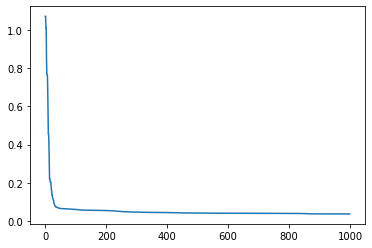

In [ ]:
Test_acc = (predict(x_test, pos) == y_test).mean()

print("Accuracy on Unseen Data:", Test_acc)


plt.plot(optimizer.cost_history)
plt.show()